In [14]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

In [15]:
words = open("names.txt", "r").read().splitlines()
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}

In [16]:
block_size = 3
vocab_size = len(stoi)
embedding_size = 10
hidden_layer_size = 100
training_iterations = 200000
batch_size = 32

In [17]:
def build_dataset(words):
    
    X, Y = [], []
    for w in words:
        context = block_size * [0]
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

In [18]:
random.seed(32)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [19]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size,embedding_size), generator = g)
W1 = torch.randn((block_size * embedding_size,hidden_layer_size), generator = g)
b1 = torch.randn(hidden_layer_size, generator = g)
W2 = torch.randn((hidden_layer_size,vocab_size) , generator = g)
b2 = torch.randn(vocab_size, generator = g)
parameters = [C, W1, b1, W2, b2]

n_parameters = sum(p.nelement() for p in parameters)

for p in parameters:
    p.requires_grad = True

In [20]:
embd = C[Xtr]
h = torch.tanh(embd.view(-1, block_size * embedding_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ytr)

In [21]:
lre = torch.linspace(-3, 0, 1000)
lri = 10**lre
lossi = []
stepi = []

In [22]:
for i in range(training_iterations):

    ix = torch.randint(0, Xtr.shape[0], (batch_size,))
    embd = C[Xtr[ix]]
    h = torch.tanh(embd.view(-1, block_size * embedding_size) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    lossi.append(loss.log10().item())
    stepi.append(i)

    for p in parameters:
        p.grad = None

    loss.backward()

    for p in parameters:
        lr = 0.1 if i < 100_000 else 0.01
        p.data += -lr * p.grad

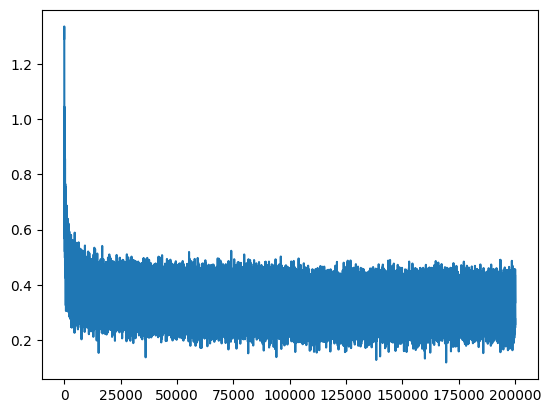

In [23]:
plt.plot(stepi, lossi)

1.8863219022750854


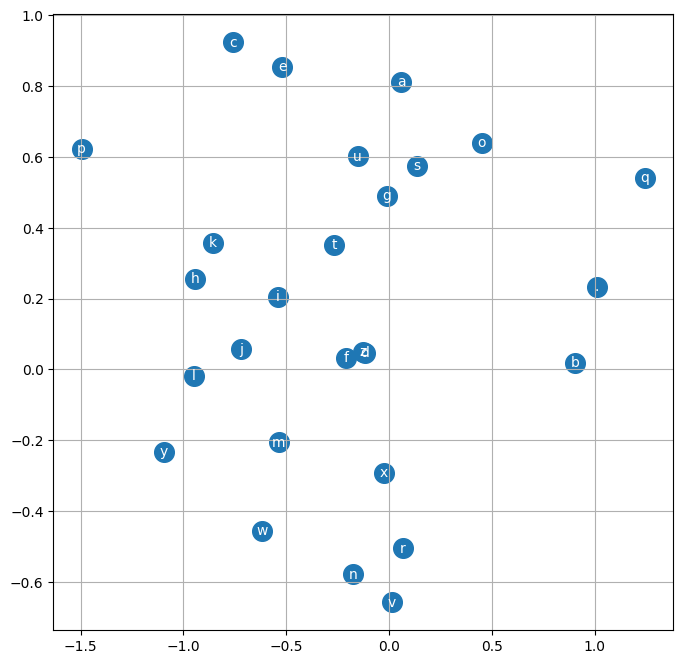

In [24]:
print(loss.item())
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
plt.grid("minor")
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')

In [25]:
embd = C[Xtr]
h = torch.tanh(embd.view(-1, block_size * embedding_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.1404433250427246


In [26]:
embd = C[Xdev]
h = torch.tanh(embd.view(-1, block_size * embedding_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1663553714752197


In [27]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(1):
    out = []
    context = block_size * [0]
    while True:
        embd = C[torch.tensor([context])]
        print(embd.shape)
        h = torch.tanh(embd.view(1, -1) @ W1 + b1)
        print(h.shape)
        logits = h @ W2 + b2
        print(logits.shape)
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        context = context[1:] + [ix]
        if ix == 0:
            break
    print("".join(out))
    

torch.Size([1, 3, 10])
torch.Size([1, 100])
torch.Size([1, 27])
torch.Size([1, 3, 10])
torch.Size([1, 100])
torch.Size([1, 27])
torch.Size([1, 3, 10])
torch.Size([1, 100])
torch.Size([1, 27])
torch.Size([1, 3, 10])
torch.Size([1, 100])
torch.Size([1, 27])
torch.Size([1, 3, 10])
torch.Size([1, 100])
torch.Size([1, 27])
torch.Size([1, 3, 10])
torch.Size([1, 100])
torch.Size([1, 27])
torch.Size([1, 3, 10])
torch.Size([1, 100])
torch.Size([1, 27])
carmah.
